In [1]:
import scipy.stats as stats
import statsmodels.stats.proportion as  SMP 
import numpy as  np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 

## Question 1

You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:


In [9]:
df=pd.read_csv('Laliga.csv',)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [10]:
df1=pd.DataFrame(np.array(df),columns=['Pos', 'Team', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
        'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst',
        'Champion', 'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth',
        'T', 'Debut', 'Since/LastApp', 'BestPosition'])


In [11]:
data=df1.drop(df.index[0])
data.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [12]:
data.columns

Index(['Pos', 'Team', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
       'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
       'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'Debut',
       'Since/LastApp', 'BestPosition'],
      dtype='object')

In [13]:
cols = ['Debut', 'Since/LastApp']
for col in cols:
    data[col] = data[col].map(lambda x: x[0:4]).astype(int)
    
data.head()    

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1987,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [18]:
data=data.drop(data.index[60]) #dropping row as it contains all null values

In [19]:
data= data.replace('-', 0, regex=True)


####  1.	Which are the teams which started playing between 1930-1980?

In [20]:
print('Teams which started playing between 1930-1980 are :_\n',
      data[(data['Debut']>= 1930) & (data['Debut']<= 1980)]['Team'])

Teams which started playing between 1930-1980 are :_
 4                Valencia
6                 Sevilla
9                Zaragoza
10             Real Betis
11    Deportivo La Coruna
12             Celta Vigo
13             Valladolid
15         Sporting Gijon
16                Osasuna
17                 Malaga
18                 Oviedo
19               Mallorca
20             Las Palmas
22                Granada
23         Rayo Vallecano
24                  Elche
26               Hercules
27               Tenerife
28                 Murcia
29                 Alaves
30                Levante
31              Salamanca
32               Sabadell
33                  Cadiz
35              Castellon
38                Cordoba
40             Recreativo
41              Burgos CF
42             Pontevedra
47              Gimnastic
50               Alcoyano
51                   Jaen
53             AD Almeria
55                 Lleida
58                 Condal
59        Atletico Tetuan
60       C

#### 2.	Which are the top 5 teams in terms of points?

In [21]:
data['Points']=data['Points'].astype(int)
data1=data.sort_values(by='Points',ascending=0)
print('Top 5 teams in terms of points are:\n',data1.Team.head())

Top 5 teams in terms of points are:
 1        Real Madrid
2          Barcelona
3    Atletico Madrid
4           Valencia
5    Athletic Bilbao
Name: Team, dtype: object


#### 3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100

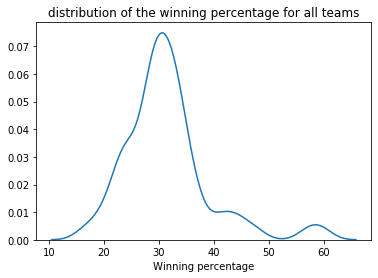

In [22]:
data['GamesWon']=data['GamesWon'].astype(int)
data['GamesPlayed']=data['GamesPlayed'].astype(int)
data['Winning percentage']=(data['GamesWon']/data['GamesPlayed'])*100

sns.distplot(data['Winning percentage'], hist=False)
plt.title('distribution of the winning percentage for all teams')
plt.show()

Distribution of the winning percentage for all teams is slightly right skewed.

In [23]:
data2=data.sort_values(by='Winning percentage',ascending=0)
print('Top 5 teams in terms of winning percentage are:\n',data2.Team.head(5))

Top 5 teams in terms of winning percentage are:
 1        Real Madrid
2          Barcelona
3    Atletico Madrid
4           Valencia
5    Athletic Bilbao
Name: Team, dtype: object


#### 4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [24]:
data['BestPosition']=data['BestPosition'].astype(int)
BestPosition1_3 = np.array(data[data['BestPosition']<=3]['Winning percentage'])
BestPosition4_7=np.array(data[(data['BestPosition']>=4) & (data['BestPosition']<=7)]['Winning percentage'])


In [25]:
import numpy as np
import scipy.stats as stats
t_statistic, p_value  =  stats.ttest_ind(BestPosition1_3,BestPosition4_7) #unpaired T-test
print('P Value:  ', p_value)

P Value:   1.5362101870160483e-05


p value is 1.5362101870160483e-05 and it is less than 5% level of significance.So the statistical decision is to reject the null hypothesis at 5% level of significance.

So there is sufficient evidence to reject the null hypothesis that there is a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

## Question 2

A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

#### a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [26]:
n=200
xbar=140
sigma=25

se=sigma/np.sqrt(n)
print('Estimated standard error of the sample mean is: ',se)

Estimated standard error of the sample mean is:  1.7677669529663687


Standard Error is a measure of the deviation of the sample means from the population.

#### b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [27]:
print('95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma is: \n',
      stats.norm.interval(0.95,loc=xbar,scale=se))

95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma is: 
 (136.5352404391258, 143.4647595608742)


#### c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [28]:
n1=100
xbar=140
sigma=25

se1=sigma/np.sqrt(n1)
print('standard error: ',se1)
print('confidence interval: ',stats.norm.interval(0.95,loc=xbar,scale=se1))

standard error:  2.5
confidence interval:  (135.10009003864985, 144.89990996135015)


#### d)	Which of the two above intervals are wider?

Confidence interval of sample with 100 60-year old women is wider than sample with 200 60-year old women.

#### e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

Estimated standard error of a sample mean tends to decrease with an increase in sample size because the estiamte of the the population mean becomes more precise with increase in sample size.

## Question 3

Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.


In [29]:
golf_df=pd.read_csv('Golf.csv')

In [30]:
golf_df.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


#### 1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

As more driving distance is desired in new golf ball. Null hypothesis is driving distance of current ball is lesser than or equal to new ball and alternate hypothesis is  driving distance of Current ball is greater than the new ball. If null hypothesis is rejected, then  the test is significant and it can be concluded that the marketing of new ball with cut resistance and long lasting charecteristics is not desirable for Par inc,

H0 : mean_new <= current_mean

H1 : mean_new > current_mean

#### 2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

In [31]:
current=np.array(golf_df['Current'])
new=np.array(golf_df['New'])

In [32]:
t_statistic, p_value  =  stats.ttest_ind(current,new)
print('P Value %1.3f' % (p_value/2)) 

P Value 0.094


p value is 0.094 and it is more than 5% level of significance.
So the statistical decision is to accept the null hypothesis at 5% level of significance.
marketing of New ball with cut resistance and long lasting characteristics is not desirable for Par inc,

#### 3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [33]:
current

array([264, 261, 267, 272, 258, 283, 258, 266, 259, 270, 263, 264, 284,
       263, 260, 283, 255, 272, 266, 268, 270, 287, 289, 280, 272, 275,
       265, 260, 278, 275, 281, 274, 273, 263, 275, 267, 279, 274, 276,
       262], dtype=int64)

In [34]:
# for current model
n=40
mu=np.mean(current)
sigma=np.std(current)
se=sigma/np.sqrt(n)

print('confidence interval of driving distances of current golf ball ')
print(stats.norm.interval(0.95,loc=mu,scale=se))
mu

confidence interval of driving distances of current golf ball 
(267.596592950119, 272.953407049881)


270.275

In [56]:
#for new model
n=40
mu1=np.mean(new)
sigma1=np.std(new)
se1=sigma1/np.sqrt(n)

print('confidence interval of driving distances of new golf ball ')
print(stats.norm.interval(0.95,loc=mu1,scale=se1))
mu1

confidence interval of driving distances of new golf ball 
(264.4715543699107, 270.5284456300893)


267.5

In [57]:
#95% confidence interval for the difference between the means of the two population
diff=current-new
n=40
mu2=np.mean(diff)
sigma2=np.std(diff)
se2=sigma2/np.sqrt(n)

print('confidence interval for the difference between the means of the two population ')
print(stats.norm.interval(0.95,loc=mu2,scale=se2))

confidence interval for the difference between the means of the two population 
(-1.4306458403840234, 6.980645840384023)
